In [1]:
!pip install gensim
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Function to preprocess text
def preprocess(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

# Load dataset
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.readlines()
    return data

# Preprocess documents
def preprocess_documents(documents):
    preprocessed_docs = []
    for doc in documents:
        preprocessed_doc = preprocess(doc)
        preprocessed_docs.append(preprocessed_doc)
    return preprocessed_docs

# Main function
def main():
    # Load data
    data_file = "C:/Users/91830/Downloads/nytimes_news_articles.txt"
    documents = load_data(data_file)
    
    # Preprocess documents
    preprocessed_documents = preprocess_documents(documents)
    
    # Create dictionary and corpus
    dictionary = corpora.Dictionary(preprocessed_documents)
    corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]
    
    # Train LDA model
    lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
    
    # Print topics
    for idx, topic in lda_model.print_topics(-1):
        print(f'Topic: {idx} \nWords: {topic}\n')
        
if __name__ == "__main__":
    main()


Topic: 0 
Words: 0.015*"park" + 0.011*"island" + 0.011*"iran" + 0.011*"russia" + 0.010*"sunday" + 0.010*"declined" + 0.009*"6" + 0.009*"fire" + 0.009*"comment" + 0.009*"shooting"

Topic: 1 
Words: 0.019*"state" + 0.016*"’" + 0.014*"would" + 0.011*"—" + 0.010*"said" + 0.009*"united" + 0.009*"new" + 0.007*"could" + 0.006*"also" + 0.006*"many"

Topic: 2 
Words: 0.023*"year" + 0.021*"’" + 0.015*"—" + 0.015*"last" + 0.013*"two" + 0.012*"new" + 0.011*"first" + 0.011*"time" + 0.009*"one" + 0.009*"three"

Topic: 3 
Words: 0.031*"percent" + 0.020*"’" + 0.011*"oil" + 0.010*"european" + 0.010*"cruz" + 0.009*"china" + 0.008*"year" + 0.008*"europe" + 0.008*"union" + 0.007*"country"

Topic: 4 
Words: 0.067*"mr." + 0.039*"http" + 0.039*"url" + 0.025*"trump" + 0.020*"party" + 0.020*"campaign" + 0.018*"republican" + 0.015*"clinton" + 0.015*"president" + 0.011*"political"

Topic: 5 
Words: 0.030*"mr." + 0.024*"said" + 0.015*"’" + 0.011*"police" + 0.011*"court" + 0.009*"case" + 0.008*"state" + 0.007*"off

In [2]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Function to preprocess text
def preprocess(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

# Load dataset
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.readlines()
    return data

# Preprocess documents
def preprocess_documents(documents):
    preprocessed_docs = []
    for doc in documents:
        preprocessed_doc = preprocess(doc)
        preprocessed_docs.append(preprocessed_doc)
    return preprocessed_docs

# Function to extract keywords for a document based on LDA model
def extract_keywords(document, lda_model, dictionary):
    # Preprocess the document
    preprocessed_doc = preprocess(document)
    
    # Convert document to bag-of-words format
    bow = dictionary.doc2bow(preprocessed_doc)
    
    # Get topic distribution for the document
    doc_topics = lda_model.get_document_topics(bow)
    
    # Sort topics by probability and get the most dominant topic
    dominant_topic = max(doc_topics, key=lambda item: item[1])[0]
    
    # Get top keywords for the dominant topic
    topic_keywords = lda_model.show_topic(dominant_topic)
    
    return [keyword[0] for keyword in topic_keywords]

# Main function
def main():
    # Load data
    data_file = "C:/Users/91830/Documents/cleaned_documet.txt"
    documents = load_data(data_file)
    
    # Preprocess documents
    preprocessed_documents = preprocess_documents(documents)
    
    # Create dictionary and corpus
    dictionary = corpora.Dictionary(preprocessed_documents)
    corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]
    
    # Train LDA model
    lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
    
    # Example: Extract keywords for the first document
    document_index = 0
    document = documents[document_index]
    keywords = extract_keywords(document, lda_model, dictionary)
    
    print("Keywords for document:")
    print(keywords)
        
if __name__ == "__main__":
    main()


Keywords for document:
['http', 'url', 'tax', 'los', 'angeles', 'apartment', 'gallery', 'village', 'avenue', 'shop']


In [3]:
import re

# Load the text file containing news articles
file_path = "C:/Users/91830/Documents/cleaned_documet.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()

# Extract URLs using regular expressions
urls = re.findall(r'(https?://\S+)', data)

# Print all the URLs
print("All URLs:")
for url in urls:
    print(url)


All URLs:
http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html
http://www.nytimes.com/2016/06/30/nyregion/mayor-de-blasios-counsel-to-leave-next-month-to-lead-police-review-board.html
http://www.nytimes.com/2016/06/30/nyregion/three-men-charged-in-killing-of-cuomo-administration-lawyer.html
http://www.nytimes.com/2016/06/30/nyregion/tekserve-precursor-to-the-apple-store-to-close-after-29-years.html
http://www.nytimes.com/2016/06/30/sports/olympics/once-at-michael-phelpss-feet-and-still-chasing-them.html
http://www.nytimes.com/2016/06/30/sports/olympics/missy-franklin-breaks-through-in-trials-and-earns-a-return-to-olympics.html
http://www.nytimes.com/2016/06/30/business/dealbook/lionsgate-is-said-to-be-near-deal-to-buy-starz.html
http://www.nytimes.com/2016/06/30/nyregion/pool-rules-no-running-no-eating-or-drinking-no-men.html
http://www.nytimes.com/2016/06/30/sports/basketball/knicks-look-to-young-blood-and-free-agency

In [4]:
!pip install beautifulsoup4 nltk requests
!pip install wordcloud matplotliba

ERROR: Could not find a version that satisfies the requirement matplotliba (from versions: none)
ERROR: No matching distribution found for matplotliba


Topic 1:
percent million said company year new 000 years city billion


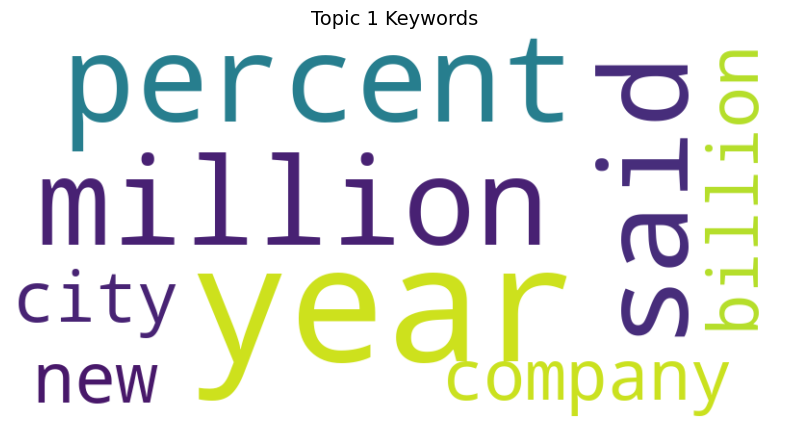

Topic 2:
mr said trump ms new clinton york campaign party year


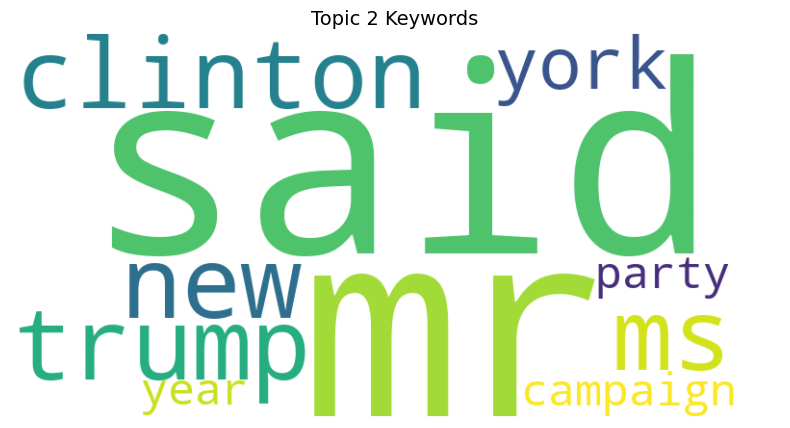

Topic 3:
mr com 2016 nytimes said www html http url state


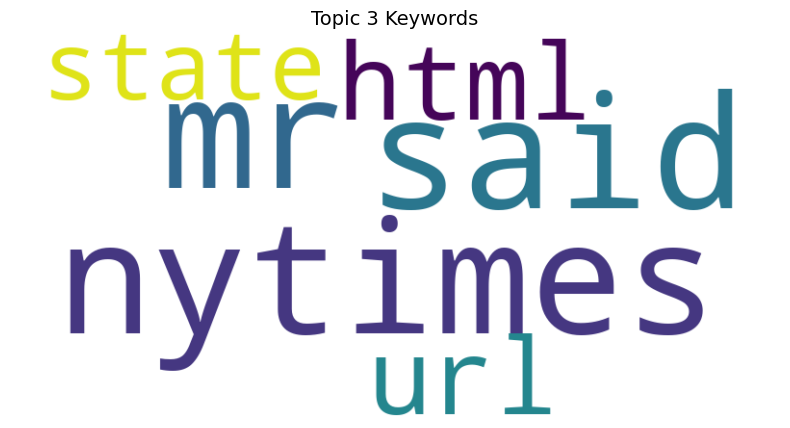

Topic 4:
said game like just time season team year play second


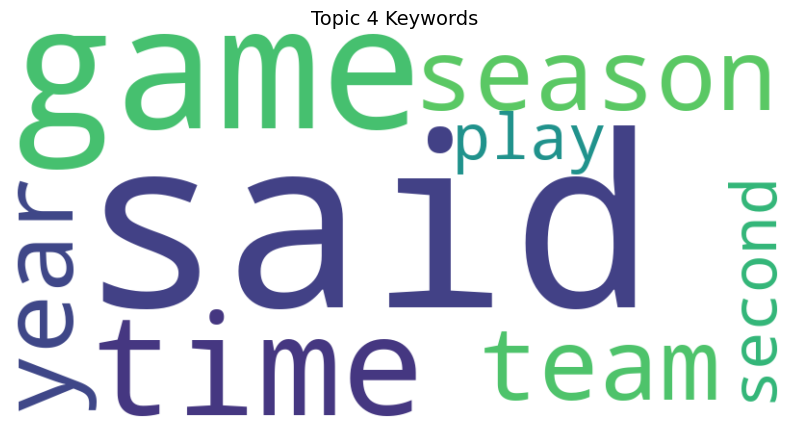

Topic 5:
said people mr like work states make united new don


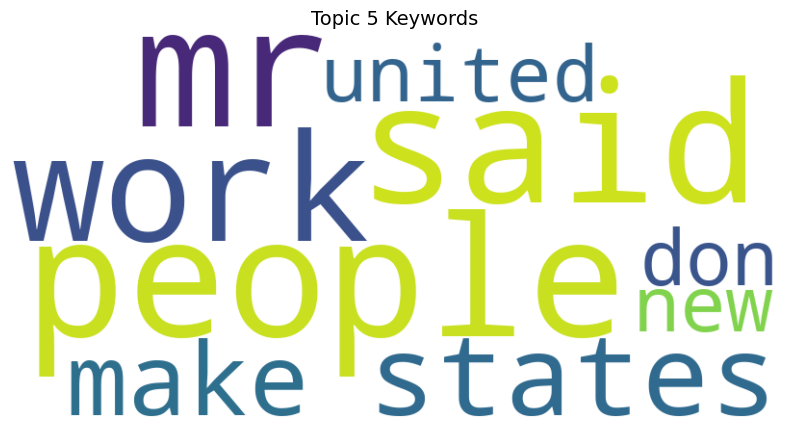

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv('C:/Users/91830/Documents/cleaned_documet.txt', delimiter='\t')

# Extract text data from the URL column
documents = data.iloc[:, 0].tolist()  # Assuming text is in the first column

# Data preprocessing
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

# Topic modeling (LDA)
num_topics = 5  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the topics and associated keywords with word clouds
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(" ".join(top_words))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(top_words))
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx + 1} Keywords", fontsize=14)
    plt.axis('off')
    plt.show()


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter

# Read the text file into a DataFrame
file_path = "C:/Users/91830/Documents/cleaned_documet.txt"
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['text'])

# Extract 10% of the document
num_samples = int(len(data) * 0.1)
data_subset = data.sample(n=num_samples, random_state=42)

# Convert text data to list
documents = data_subset['text'].tolist()

# Define the number of topics
num_topics = 5

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

# Fit LDA model to the vectorized data
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Extract keywords and topics from the LDA model
feature_names = vectorizer.get_feature_names_out()
keywords_topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    keywords_topics.append(top_words)
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")
    print("Lines containing the keywords:")
    for keyword in top_words:
        lines_with_keyword = [line for line in documents if keyword in line.lower()]
        print(f"Keyword: {keyword}")
        for line in lines_with_keyword[:5]:  # Print only the first 5 lines containing the keyword
            print(line)
    print()



Topic 1: mr said trump game clinton campaign games season percent republican
Lines containing the keywords:
Keyword: mr
When the gunman left the bathroom, Mr. Casiano tried to urge others to leave, he said, and was able to slip away and escape. He said he was in a hospital bed by about 3 a.m., two hours before the siege ended.
Mr. Trump won majorities in all regions except for rural upstate areas. Some Republicans questioned why Mr. Cruz spent so little time in upstate New York, where Mr. Trump’s support two weeks ago was softer than it appeared. Instead, Mr. Cruz devoted his time mostly to the city and to fundraising.
Also under investigation is a decision by Mr. Spota’s office to have detectives covertly follow Justin Meyers, a press secretary for Mr. Bellone, two of the people said.
Last summer, Mr. Lynch was invited to speak about labor rights at a construction conference in Dubai and was turned away at the airport. Officials did not give a reason, but he later saw that his deporta

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import defaultdict

# Read the text file into a DataFrame
file_path = "C:/Users/91830/Documents/cleaned_documet.txt"
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['text'])

# Extract 5% of the document
num_samples = int(len(data) * 0.05)
data_subset = data.sample(n=num_samples, random_state=42)

# Convert text data to list
documents = data_subset['text'].tolist()

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# K-means clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Group documents by cluster
cluster_docs = defaultdict(list)
for doc_idx, cluster_label in enumerate(kmeans.labels_):
    cluster_docs[cluster_label].append(documents[doc_idx])

# Print documents in each cluster
for cluster_label, docs in cluster_docs.items():
    print(f"Cluster {cluster_label + 1}:")
    for doc in docs[:5]:  # Print only the first 5 documents in each cluster
        print(doc)
    print()

    

C:\Users\91830\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 4:
It had been only a few years since he shot a TV pilot for a show that did not get picked up, leaving him so disheartened about acting that he started applying for jobs as a hotel clerk. But he had been moved to tears as an audience member at a reading of the first act earlier that summer at Vassar’s Powerhouse Theater.
In 1978, Proposition 13 sharply reduced California’s property taxes, presaging a nationwide tax revolt. More recently, the state government adopted one of the nation’s most expansive minimum wage laws, to $15 statewide by 2022, reflecting a populist tide against income inequality that the rent control effort is also riding.
American Airlines has a Five Star Service program for first- and business-class customers; it’s available in 12 domestic airports and five international airports. For a starting price of $250 for the first adult and $75 for each additional adult, services include a curbside meet and greet and priority security screening, where available.
Wh

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter

# Read the text file into a DataFrame
file_path = "C:/Users/91830/Documents/cleaned_documet.txt"
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['text'])

# Extract 5% of the document
num_samples = int(len(data) * 0.05)
data_subset = data.sample(n=num_samples, random_state=42)

# Convert text data to list
documents = data_subset['text'].tolist()

# Define the number of topics
num_topics = 5

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

# Fit LDA model to the vectorized data
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Extract keywords and topics from the LDA model
feature_names = vectorizer.get_feature_names_out()
keywords_topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    keywords_topics.append(top_words)
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")
    
    # Count occurrences of keywords in documents
    word_counts = Counter()
    for word in top_words:
        for doc in documents:
            if word in doc:
                word_counts[word] += 1
    print("Word counts for keywords:")
    for word, count in word_counts.items():
        print(f"{word}: {count}")
    print()


Topic 1: com 2016 nytimes www http url html 05 06 sports
Word counts for keywords:
com: 2197
2016: 425
nytimes: 420
www: 401
http: 398
url: 14
html: 398
05: 189
06: 193
sports: 104

Topic 2: mr said ms new like people just city state police
Word counts for keywords:
mr: 9
said: 2251
ms: 782
new: 653
like: 733
people: 477
just: 425
city: 228
state: 441
police: 149

Topic 3: said mr new time house company years 000 just city
Word counts for keywords:
said: 2251
mr: 9
new: 653
time: 1108
house: 166
company: 266
years: 399
000: 219
just: 425
city: 228

Topic 4: said mr trump like new people year clinton think government
Word counts for keywords:
said: 2251
mr: 9
trump: 20
like: 733
new: 653
people: 477
year: 889
clinton: 4
think: 234
government: 230

Topic 5: said year game season percent time new team like mr
Word counts for keywords:
said: 2251
year: 889
game: 264
season: 204
percent: 213
time: 1108
new: 653
team: 262
like: 733
mr: 9



Topic 1: com 2016 nytimes www http url html 05 06 sports


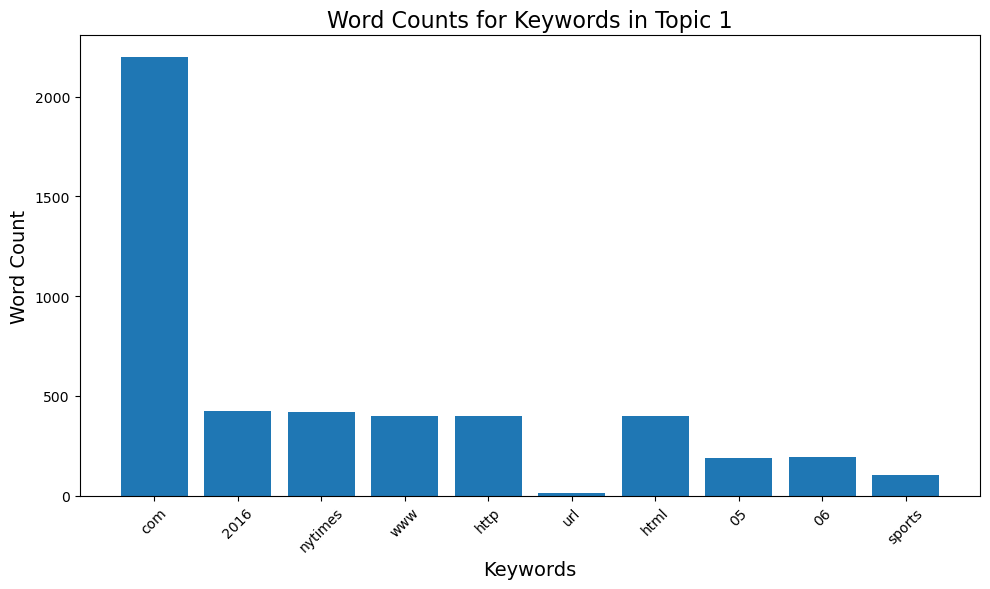

Topic 2: mr said ms new like people just city state police


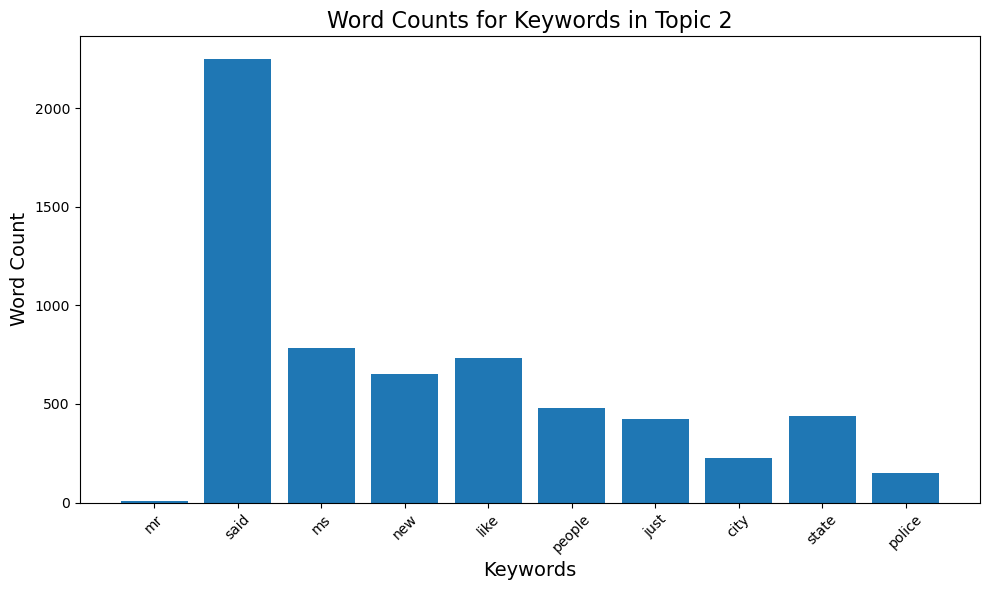

Topic 3: said mr new time house company years 000 just city


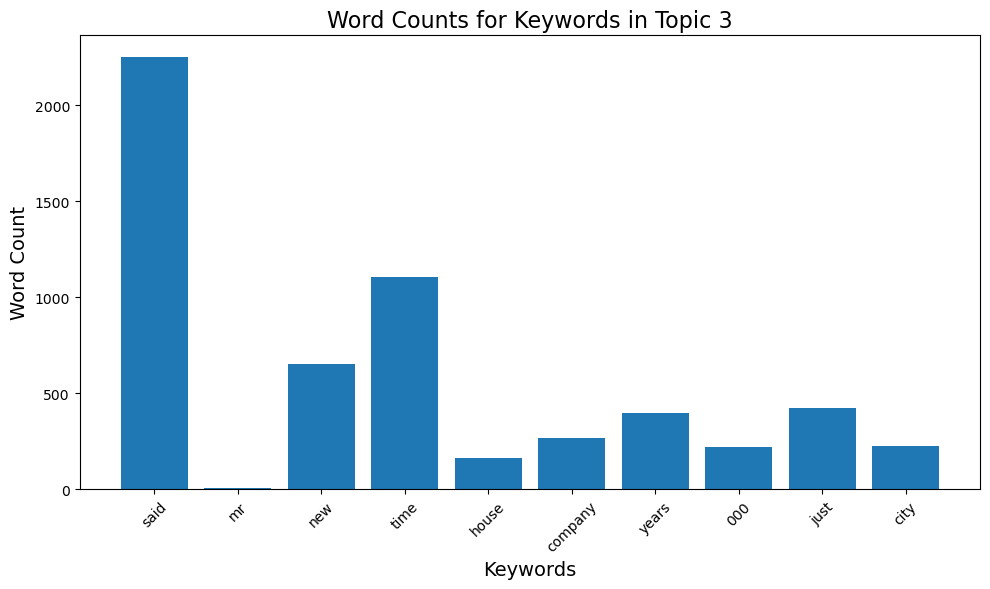

Topic 4: said mr trump like new people year clinton think government


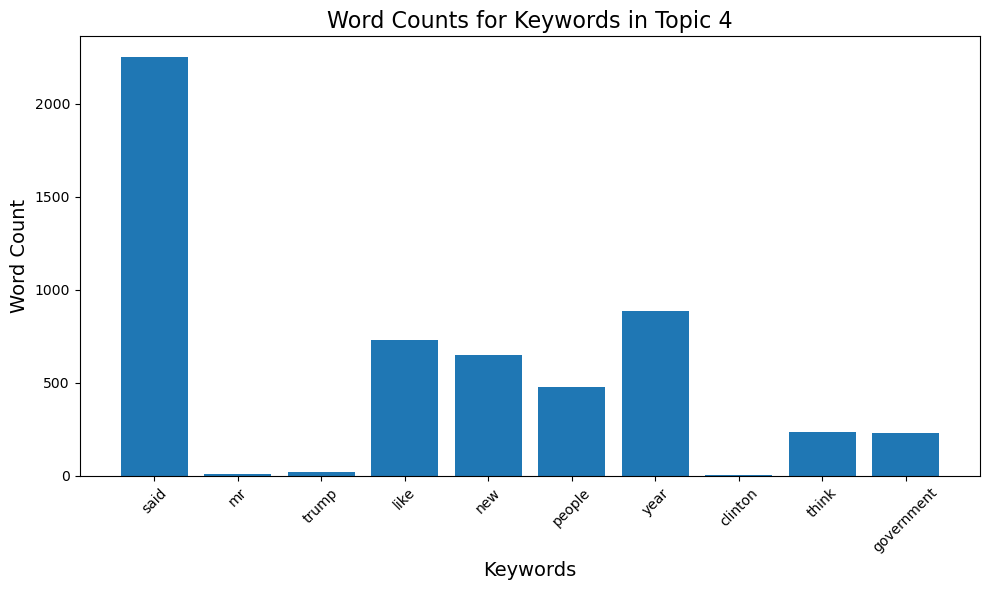

Topic 5: said year game season percent time new team like mr


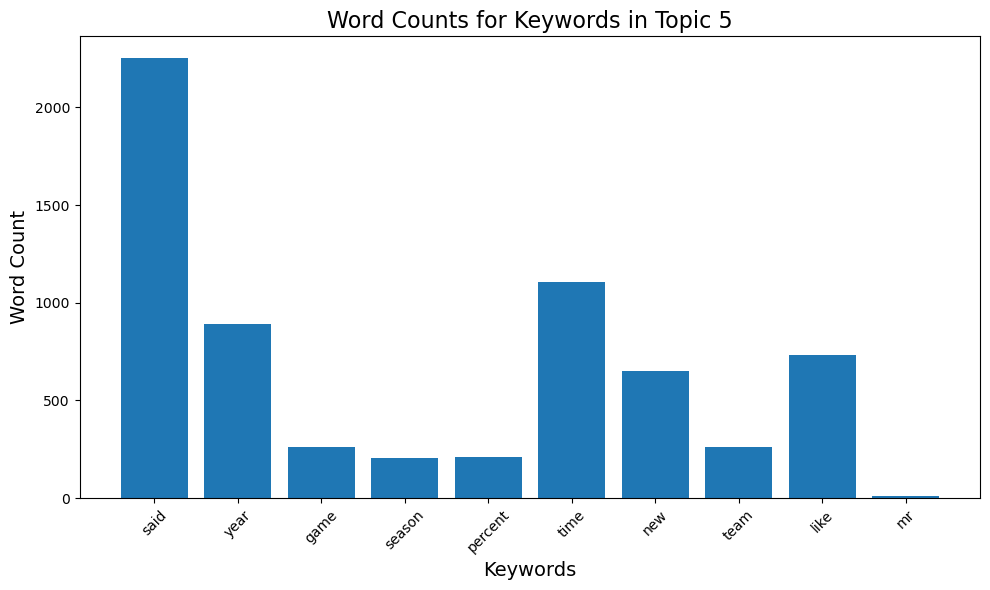

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import matplotlib.pyplot as plt

# Read the text file into a DataFrame
file_path = "C:/Users/91830/Documents/cleaned_documet.txt"
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['text'])

# Extract 5% of the document
num_samples = int(len(data) * 0.05)
data_subset = data.sample(n=num_samples, random_state=42)

# Convert text data to list
documents = data_subset['text'].tolist()

# Define the number of topics
num_topics = 5

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

# Fit LDA model to the vectorized data
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Extract keywords and topics from the LDA model
feature_names = vectorizer.get_feature_names_out()
keywords_topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    keywords_topics.append(top_words)
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")
    
    # Count occurrences of keywords in documents
    word_counts = Counter()
    for word in top_words:
        for doc in documents:
            if word in doc:
                word_counts[word] += 1
    
    # Plot word counts in a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(word_counts.keys(), word_counts.values())
    plt.xlabel('Keywords', fontsize=14)
    plt.ylabel('Word Count', fontsize=14)
    plt.title(f'Word Counts for Keywords in Topic {topic_idx + 1}', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Read the text file into a DataFrame
file_path = "C:/Users/91830/Documents/cleaned_documet.txt"
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['text'])

# Extract 5% of the document
num_samples = int(len(data) * 0.05)
data_subset = data.sample(n=num_samples, random_state=42)

# Convert text data to list
documents = data_subset['text'].tolist()

# Define the number of topics
num_topics = 5

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

# Fit LDA model to the vectorized data
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Extract keywords and topics from the LDA model
feature_names = vectorizer.get_feature_names_out()
keywords_topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    keywords_topics.append((topic_idx + 1, top_words))

# Print keywords and topics side by side
for topic_idx, topic_keywords in keywords_topics:
    print(f"Topic {topic_idx}: {' '.join(topic_keywords)}")
    print()


Topic 1: com 2016 nytimes www http url html 05 06 sports

Topic 2: mr said ms new like people just city state police

Topic 3: said mr new time house company years 000 just city

Topic 4: said mr trump like new people year clinton think government

Topic 5: said year game season percent time new team like mr



In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Read the text file into a DataFrame
file_path = "C:/Users/91830/Documents/cleaned_documet.txt"
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['text'])

# Extract 5% of the document
num_samples = int(len(data) * 0.05)
data_subset = data.sample(n=num_samples, random_state=42)

# Convert text data to list
documents = data_subset['text'].tolist()

# Define the number of topics
num_topics = 5

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

# Fit LDA model to the vectorized data
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Extract keywords from the LDA model
feature_names = vectorizer.get_feature_names_out()
keywords_topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    keywords_topics.extend(top_words)

# Print keywords
print("Keywords:")
for keyword in keywords_topics:
    print(keyword)


Keywords:
com
2016
nytimes
www
http
url
html
05
06
sports
mr
said
ms
new
like
people
just
city
state
police
said
mr
new
time
house
company
years
000
just
city
said
mr
trump
like
new
people
year
clinton
think
government
said
year
game
season
percent
time
new
team
like
mr


                                                text
0  URL: http://www.nytimes.com/2016/06/30/sports/...
1  WASHINGTON — Stellar pitching kept the Mets af...
2  “We were going to ride our pitching,” Manager ...
3  Wednesday’s 4-2 loss to the Washington Nationa...
4  “We’re not even giving ourselves chances,” Col...
Topic 1: percent million 000 year company said billion market new companies
Topic 2: said mr ms like new people just york time want
Topic 3: 2016 nytimes com www html http url 06 05 04
Topic 4: game _____ said team season games players play time just
Topic 5: mr said trump people new state clinton court law campaign


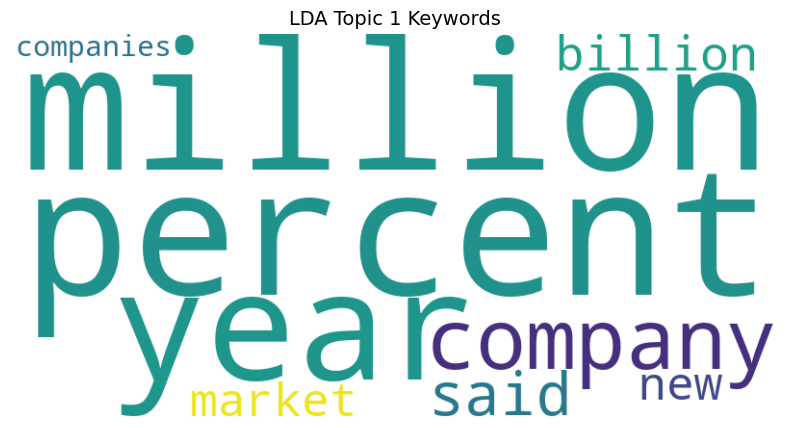

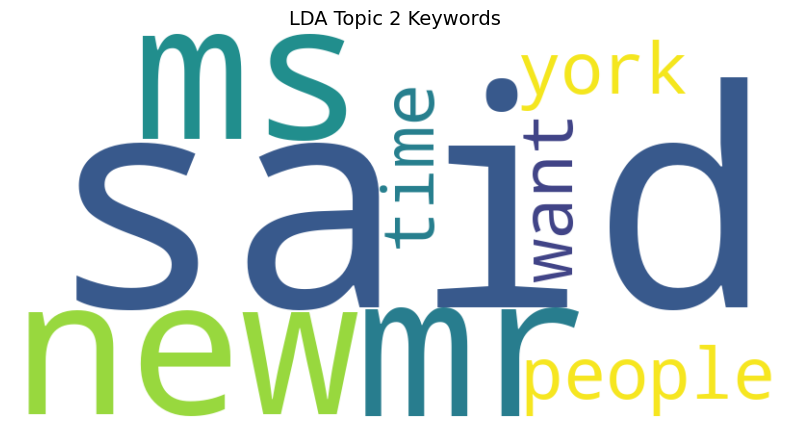

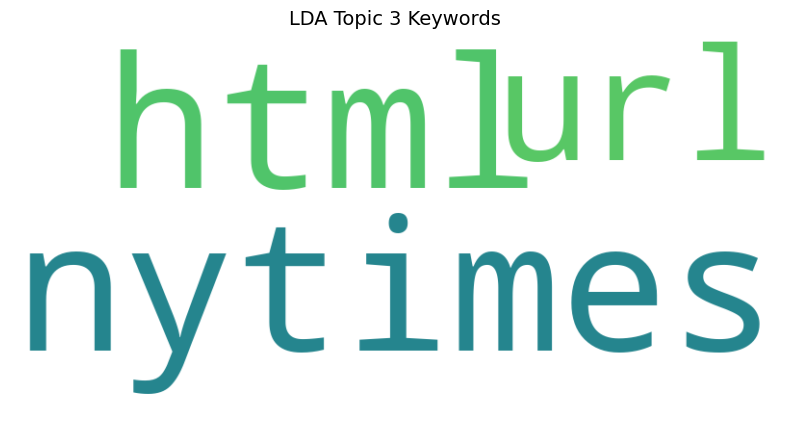

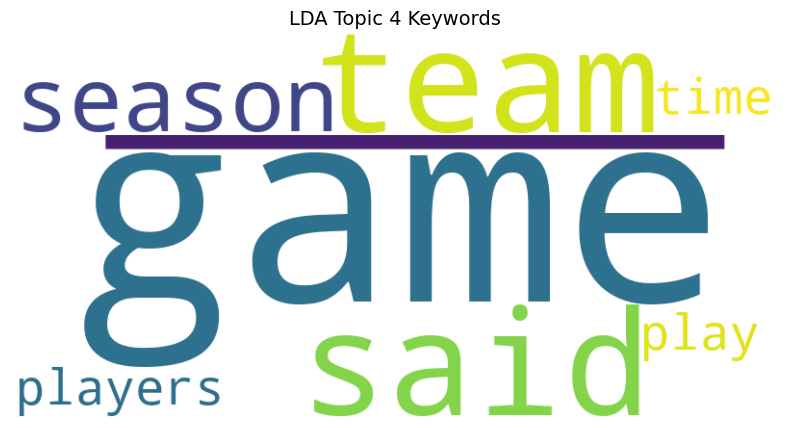

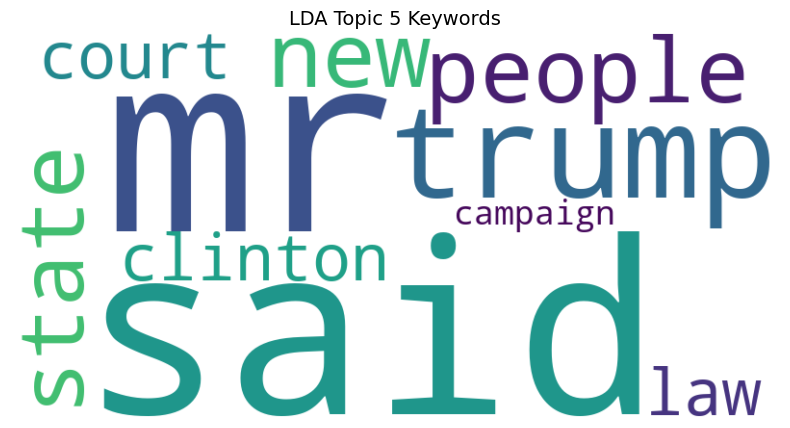

Topic 1: nytimes 2016 url www http html com 06 05 04
Topic 2: said mr trump new people like ms year just time
Topic 3: _____ civil abate syrian war observers president resolution 1997 mugabe
Topic 4: mr trump clinton mrs campaign republican donald sanders party obama
Topic 5: said don mr know want think going just really ve


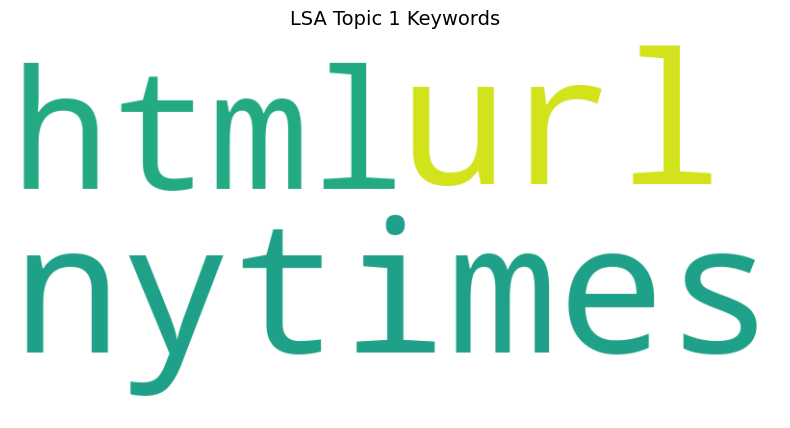

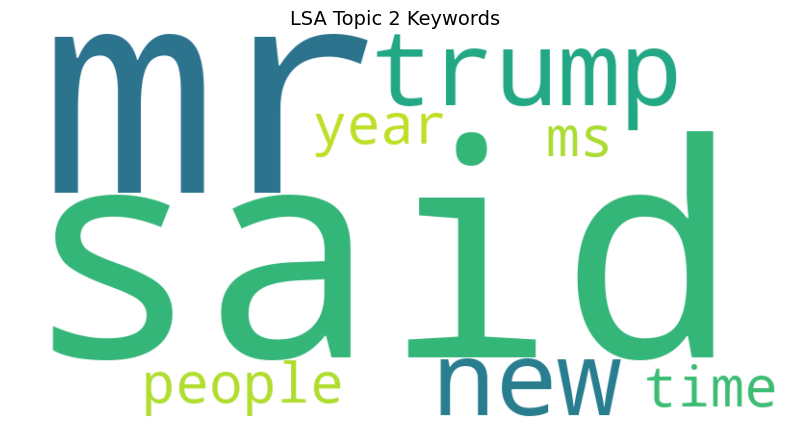

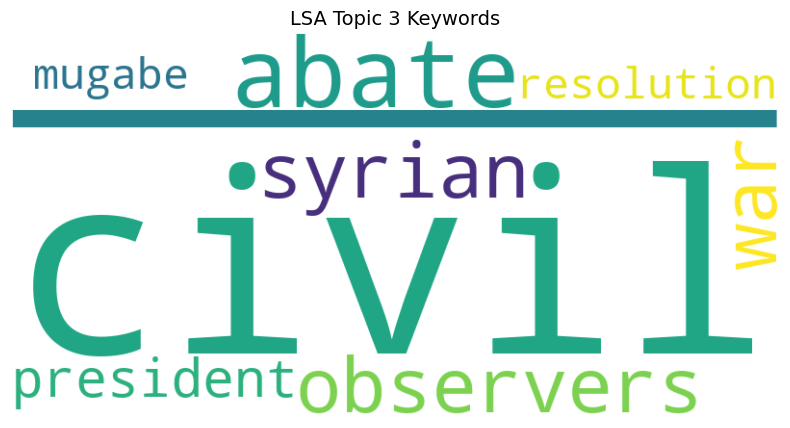

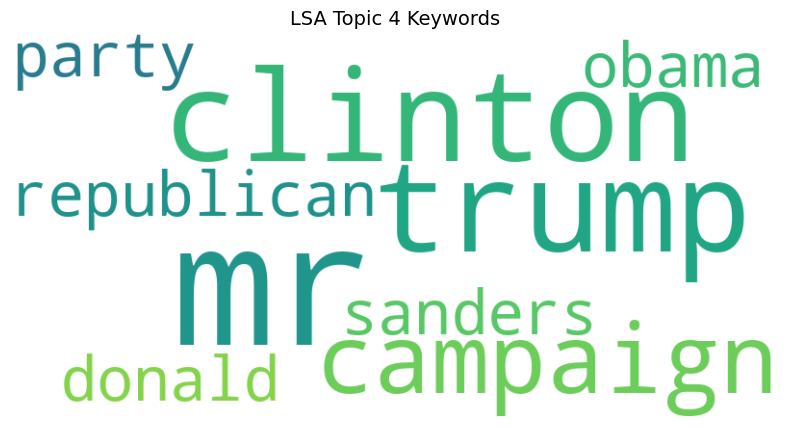

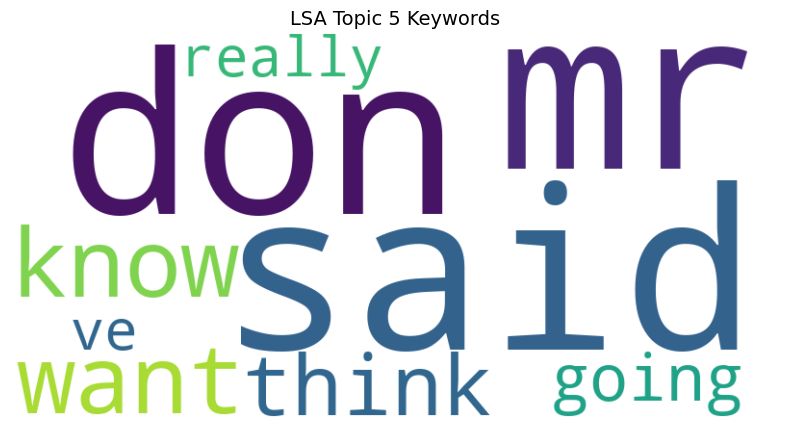

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the text file into a DataFrame
file_path ="C:/Users/91830/Documents/cleaned_documet.txt"
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['text'])

# Display the first few rows of the DataFrame to inspect the data
print(data.head())

# Define the number of topics
num_topics = 5

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)

# Extract keywords and topics from LDA model
feature_names = tfidf_vectorizer.get_feature_names_out()
lda_topics = lda.components_
keywords_lda = []
for topic_idx, topic in enumerate(lda_topics):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    keywords_lda.append(top_words)
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

# Generate word clouds for LDA topics
for topic_idx, topic_keywords in enumerate(keywords_lda):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"LDA Topic {topic_idx + 1} Keywords", fontsize=14)
    plt.axis('off')
    plt.show()

# LSA model
lsa = TruncatedSVD(n_components=num_topics, random_state=42)
lsa.fit(tfidf_matrix)

# Extract keywords and topics from LSA model
lsa_topics = lsa.components_
keywords_lsa = []
for topic_idx, topic in enumerate(lsa_topics):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    keywords_lsa.append(top_words)
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

# Generate word clouds for LSA topics
for topic_idx, topic_keywords in enumerate(keywords_lsa):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"LSA Topic {topic_idx + 1} Keywords", fontsize=14)
    plt.axis('off')
    plt.show()


In [13]:
# Compute perplexity 
perplexity = lda.perplexity(X)
print(f"Perplexity: {perplexity}")


Perplexity: 1626028.515143217
